# Logistisches Modell

In [24]:
import pathlib
import urllib

import matplotlib.pyplot as plt
import pandas as pd

In dieser Hausaufgabe sollen Sie die Kostenfunktion einer logistischen Regression visualisieren. Das passiert im anderen Notebook der Hausaufgabe. Dort benötigen Sie aber Daten, die Sie zunächst aufbereiten, kodieren, und visualisieren sollen. Dieser Teil geschieht in diesem Notebook.

## [5P] Daten einlesen und verarbeiten

Als Datengrundlage bietet sich der Iris-Datensatz an. Laden Sie ihn zunächst herunter, falls erforderlich, und lesen ihn ein:

In [25]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data_file = pathlib.Path(url.rsplit('/', 1)[-1])

if not data_file.is_file():
    # We could also use `df_iris = pd.read_csv(url)`
    # but here we save to disk to avoid unnecessary repeated downloads.
    urllib.request.urlretrieve(url, data_file)

df_iris = pd.read_csv(data_file.resolve(), header=None)

Für diese Aufgabe benötigen Sie einen eindimensionalen Datensatz, dem genau ein Label zugeordnet ist. In den Spalten sind die folgenden Größen in dieser Reihenfolge enthalten:

In [26]:
column_names = ["sepal length", "sepal width", 'petal length', 'petal width', 'species']

**[1P]** Ordnen zunächst dem DataFrame die Spaltennamen und Datentypen zu.

In [27]:
import numpy as np
df_iris = (
    df_iris
    .rename(columns=dict(enumerate(column_names)))
    .astype({'sepal length': np.float64, 'sepal width': np.float64, 'petal length': np.float64, 'petal width': np.float64,
        'species': pd.CategoricalDtype(categories=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])})
)
df_iris

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**[4P]** Für unser Modell beschränken wir uns auf die Kelchblattlänge (`'sepal length'`) der Spezies `Iris-virginica` und `Iris-setosa`. Stellen Sie für diese beiden Spezies die Verteilung der Kelchblattlängen grafisch in einem Diagramm dar.

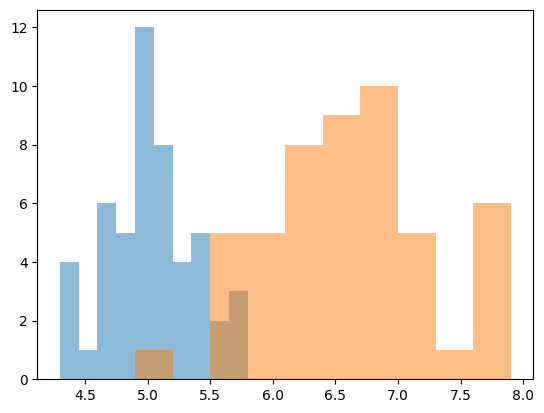

In [28]:
quantity = 'sepal length'
species = ['Iris-setosa', 'Iris-virginica']

for s in species:
    plt.hist(df_iris[df_iris['species'] == s][quantity], bins=10, alpha=0.5, label=s)

## [5P] Daten auswählen und Variablen kodieren

Als nächstes sollen Sie den Datensatz filtern und die Variablen kodieren. Beschränken Sie sich auf alle Datenpunkte der Kelchblattlänge, die zu einer der beiden obigen Spezies gehören. Setzen Sie den Index zurück. Ersetzen Sie die Spalte `species` durch eine Series mit Einträgen vom Typ Integer, und zwar `0`, falls es sich um `Iris-setosa` handelt, und `1`, falls es sich um `Iris-virginica` handelt.

Denken Sie daran, idiomatischen, verständlichen, und performanten Code zu schreiben — auch wenn dieser Datensatz noch klein ist.

In [29]:
sepal_series = df_iris.loc[df_iris.species.isin(species), [quantity, 'species']].reset_index(drop=True)
sepal_series = (
    sepal_series
    .assign(
        species = (
            sepal_series
            .species
            .cat.remove_unused_categories()
            .cat.codes
        )
    )
)
sepal_series

,sepal length,species
0,5.1,0
1,4.9,0
2,4.7,0
3,4.6,0
4,5.0,0
...,...,...
95,6.7,1
96,6.3,1
97,6.5,1
98,6.2,1


## Logistisches Modell

Um für eine kontinuierliche Variable $x$ ein binäres Label $y$ vorherzusagen, bietet sich ein logistisches Modell an. Hier ist $x$ die Kelchblattlänge und $y$ die Spezies der zugehörigen Pflanze. Die Daten wurden so kodiert, dass $y=0$ bzw. $y=1$ der Spezies "Iris setosa" bzw. "Iris virginica" entspricht. Das haben Sie in der vorherigen Teilaufgabe getan — dieser Zwischenstand ist allerdings auch mitgeliefert.

Die Vorhersage eines logistischen Modells $\hat{y}(x)$ ist dann die *Wahrscheinlichkeit*, mit der es sich bei einer Pflanze dieser Kelchblattlänge um die Spezies "Iris virginica" handelt. Für eine Variable hat es zwei freie Parameter $a_0$ und $a_1$ und lautet:

$$\hat{y}(x) = \frac{1}{1 + \mathrm{e}^{- (a_0 + a_1 x)}}$$

In [30]:
def logistic_model(x, a_0: float, a_1: float) -> float:
    """Logistic model for one continuous variable.

    a_0, a_1 -- free parameters of the logistic model.
    x -- continuous scalar variable

    Returns a probability 0 < p < 1 under a logistic model of `a_0 + a_1 x`.
    """
    return 1 / (1 + np.exp(-(a_0 + a_1 * x)))

## [3P] Daten einlesen und visualieren

Lesen Sie nun den fertig kodierten Datensatz ein:

In [31]:
coded_df_iris = pd.read_csv('coded_df_iris.csv')

Stellen Sie in einer gemeinsamen Abbildung die Datenpunkte sowie das logistische Modell mit $a_0 = -80;~~a_1 = 15$ sinnvoll im gesamten Datenbereich dar.

<Axes: xlabel='sepal length', ylabel='y_hat'>

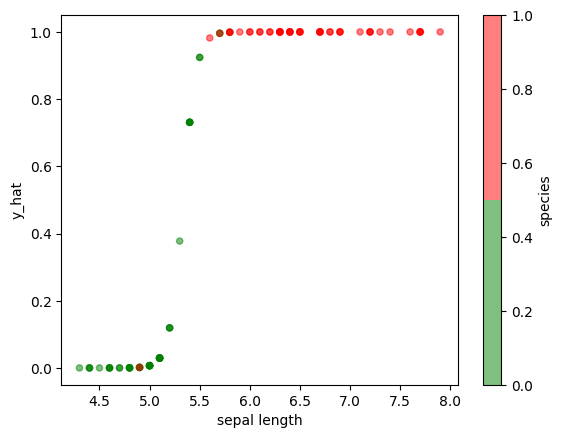

In [32]:
from matplotlib.colors import ListedColormap as LCM

coded_df_iris['y_hat'] = logistic_model(coded_df_iris['sepal length'], a_0=-80, a_1=15)

coded_df_iris.plot.scatter(x='sepal length', y='y_hat', c='species', colormap=LCM(['green', 'red']), alpha=0.5)

## [3P] Wert der Kostenfunktion für ausgewählte Modelle

Als Kostenfunktion für logistische Regression dient die "mittlere Kreuzentropie":

In [33]:
def average_cross_entropy(predictions, truth) -> float:
    """Calculate average cross entropy between two arrays.

    Typically, `predictions` would hold predicted probabilities for labels
    and `truth` would hold the observed values.

    But really any two Series with values between 0 and 1 work.
    """
    cross_entropies = -np.log(truth * predictions + (1 - truth) * (1 - predictions))
    return cross_entropies.mean()

Berechnen Sie die mittlere Kreuzentropie zwischen den Daten und dem logistischen Modell mit $a_0 = -80; ~~ a_1 = 15$ sowie vier weiteren logistischen Modellen mit von Ihnen gewählten Werten für $a_0$ und $a_1$.

Stellen Sie diese Modelle gemeinsam mit den Daten und den mittleren Kreuzentropien sinnvoll gemeinsam dar.

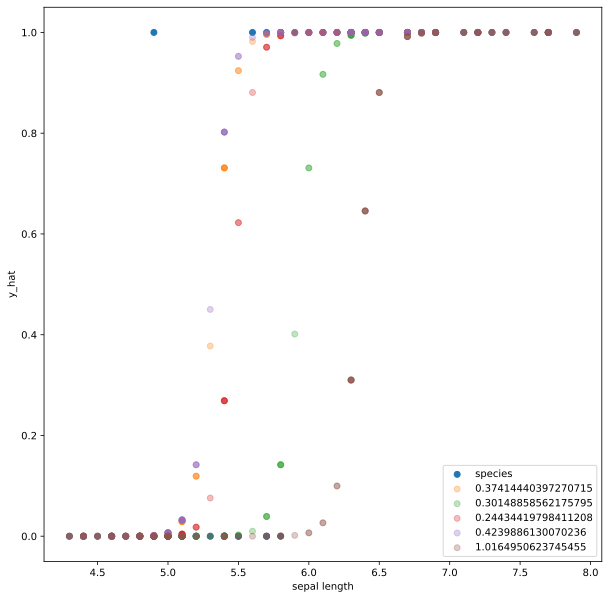

In [62]:
a_params = [[-80, 15]] + [[np.random.randint(-90, -80), np.random.randint(13, 17)] for _ in range(4)]
avg_cross_entropy = pd.DataFrame()


fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot(111)

axes.set_xlabel('sepal length')
axes.set_ylabel('y_hat')

axes.scatter(coded_df_iris['sepal length'], coded_df_iris['species'], label='species')


for a_0, a_1 in a_params:
    coded_df_iris['y_hat'] = logistic_model(coded_df_iris['sepal length'], a_0=a_0, a_1=a_1)
    axes.scatter(coded_df_iris['sepal length'], coded_df_iris['y_hat'], 
                 label = f'{average_cross_entropy(coded_df_iris["y_hat"], coded_df_iris["species"])}',
                 alpha=0.3)
   
axes.legend()
    

## [3P] Konturplot der Kostenfunktion

Erstellen Sie einen Konturplot der Kostenfunktion. Tragen Sie dazu die mittlere Kreuzentropie eines logistischen Modells mit den Parametern $a_0$ und $a_1$ als Konturplot gegen die Parameter $a_0$ und $a_1$ auf. Wählen Sie einen sinnvollen Wertebereich für die Parameter. Welche Form hat der Bereich mit "kleinen" Werten der Kostenfunktion? Wann und warum treten sehr große Werte auf?

Hilfe zur Erstellung eines Konturplots mit matplotlib finden Sie z.B. unter https://alex.miller.im/posts/contour-plots-in-python-matplotlib-x-y-z/. Es bietet sich an, zunächst die `np.meshgrid`s für `a_0` und `a_1` zu erstellen, die Daten dann in das auf dieser Seite beschriebene "long"-Format umzuwandeln, dort die Kostenfunktion auszuwerten, und dann wie dort beschrieben mit der `pivot_table`-Methode die Werte der Kostenfunktion in das zum Plotten benötigte Format umzuwandeln.

/tmp/ipykernel_1711/1361074410.py:16: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


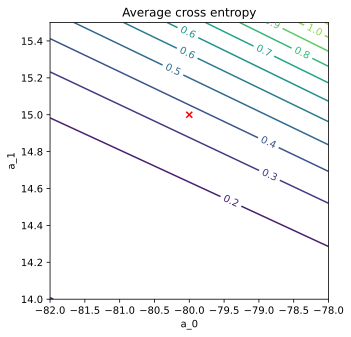

In [85]:
contour_size = 100

contour_df = pd.DataFrame()
contour_df['x'] = np.repeat(np.linspace(-82, -78, contour_size), contour_size)
contour_df['y'] = np.tile(np.linspace(14, 15.5, contour_size), contour_size)
contour_df['z'] = contour_df.apply(lambda row: average_cross_entropy(logistic_model(coded_df_iris['sepal length'], a_0=row['x'], a_1=row['y']), coded_df_iris['species']), axis=1)  

Z = contour_df.pivot_table(index='x', columns='y', values='z').T.values

X_unique = np.sort(contour_df.x.unique())
Y_unique = np.sort(contour_df.y.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

import matplotlib.pyplot as plt
from matplotlib import rcParams


# Initialize plot objects
rcParams['figure.figsize'] = 5, 5 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

# Generate a contour plot
cp = ax.contour(X, Y, Z, 10, cmap='viridis')
cp.clabel(fmt='%1.1f', fontsize=10)
ax.set_xlabel('a_0')
ax.set_ylabel('a_1')
ax.set_title('Average cross entropy')
ax.scatter(-80, 15, c='red', marker='x', label='true parameters')


## [1P] Mit den Daten herumspielen

Sobald Sie für einen Datensatz die Kostenfunktion mit einem Konturplot visualisiert haben, sollte es relativ leicht sein, dies für andere Datensätze zu wiederholen. In der csv-Datei sind auch andere Größen und alle Spezies kodiert.

Wählen Sie z.B. eine andere Messgröße, eine andere Kombination von Spezies (achten Sie dann auf deren Kodierung!), oder transformieren Sie Ihre Daten vor Darstellung der Kostenfunktion. In der Vorlesung wurde beispielsweise Skalierung von Mittelwert und Standardabweichung als sinnvolle Transformation oder die Kostenfunktion "Mean Squared Error" als nicht für logistische Regression geeignet angesprochen. Sie könnten auch dies implementieren und diskutieren.

Probieren Sie mehr als einen Ansatz aus und setzen Sie diese um. Es ist nicht so wichtig, *was* Sie genau tun, wie *dass* Sie mehrere Dinge versuchen und zumindest ein interessantes Ergebnis erhalten und sinnvoll visualisieren. Dokumentieren Sie Ihr Vorgehen sinnvoll.

In [ ]:
...

Ellipsis